# Семинар 1. Python, numpy

##  Starter-pack (не для курса)

👒 Разберитесь с гитхабом. Клонируйте себе [репо](https://github.com/AsyaKarpova/ml_nes_2021) нашего курса. Необязательные [советы](https://t.me/KarpovCourses/213) по оформлению.

👒 [Leetcode](https://leetcode.com/problemset/all/https://leetcode.com/problemset/all/): тут можно решать задачки на алгоритмы на питоне (и не только)

👒 Если вы почему-то решили, что вам надо понимать алгоритмы, но не хочется  ботать целый курс, почитайте «Грокаем алгоритмы..»

👒 Можно скачать Slack и вступить в ods ([тык](https://ods.ai/join-community)).

## Вспомнить Python за 10 минут

### list comprehensions — [expression for member in iterable]

- Создайте лист с квадратами чисел от 1 до 10 с помощью list comprehensions

In [1]:
[i**2 for i in range(1, 11)]

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

- С помощью list comprehensions создайте новый лист с квадратами только тех чисел от 1 до 10, что без остатка делятся на 3.

In [2]:
[i**2 for i in range(1, 11) if i%3 == 0]

[9, 36, 81]

- С помощью list comprehensions замените все отрицательные значения в листе на 0

In [3]:
candy_prices = [35.4, 26.7, -33.8, 41.9, -100, 25]

In [5]:
[i if i > 0 else 0 for i in candy_prices]

[35.4, 26.7, 0, 41.9, 0, 25]

-  walrus operator

Cгенерируйте 20 значений случайной величины и оставьте только те, что больше 28.

In [6]:
import random
def get_number():
    return random.randrange(17, 35)

In [7]:
num = 1
print(num)

1


In [8]:
print(num:=1)

1


In [9]:
[i for _ in range(20) if (i:= get_number()) > 28]

[29, 30, 34, 32, 31, 34, 34]

### lambda function

- отсортируйте айдишники по убыванию

In [18]:
ids = ['id1', 'id2', 'id30', 'id3', 'id100', 'id22']

In [10]:
def sqrt(x):
    return x * x

In [12]:
sqrt(2)

4

In [11]:
(lambda x: x * x)(2)

4

In [24]:
sorted(ids, key=lambda x: int(x[2:]), reverse=True)

['id100', 'id30', 'id22', 'id3', 'id2', 'id1']

### Индексация

- Вспомните, как вывести последний элемент; все, кроме последнего; через один элемент, начиная с первого; в обратном порядке

In [14]:
elems = [1, 2, 3, 'b||']

In [15]:
elems[-1]

'b||'

In [16]:
elems[0:-1]

[1, 2, 3]

In [31]:
elems[1::2]

[2, 'b||']

In [32]:
elems[::-1]

['b||', 3, 2, 1]

## Задачки

- Написать функцию, которая выдает вектор с кумулятивными суммами. Функция должна изменять старый вектор, а не возвращать новый.

`Input: [1,2,3,4]`

`Output: [1,3,6,10]`, т. к. `[1, 1+2, 1+2+3, 1+2+3+4]`


In [21]:
from typing import List
def runningSum(nums: List[int]) -> List[int]:
    for i in range(1, len(nums)):
        nums[i] += nums[i-1]
    return nums

In [22]:
def runningSum(nums: List[int]) -> List[int]:
    return  [sum(nums[:i+1]) for i in range(len(nums))] # не in-place

In [23]:
nums = [1, 3, 2]
runningSum(nums)

[1, 4, 6]

In [24]:
nums

[1, 3, 2]

- Дан вектор `prices` с ценами акций. Цена в день `[i]` — это `prices[i]`.
Вы можете один раз купить и один раз продать акцию. Найдите максимальный профит от этой операции. Если профита нет, вверните 0 (ничего не покупайте).


`Input: [1,10,8,16]`

`Output: 15`, т. к. `16-1`


In [60]:
def maxProfit(prices: List[int]) -> int:
    return max([max(prices[i:]) - prices[i] for i in range(len(prices))])

In [78]:
# хардкор
def maxProfit(prices: List[int]) -> int:
    if len(prices) == 1:
            return 0
    else:
        days_purchase = [-1] * (len(prices) - 1)
        profit = [-1] * (len(prices) - 1)
        days_purchase[0] = 0
        profit[0] = prices[1] - prices[0]
        for i in range(1, len(days_purchase)):
            if prices[i] < prices[days_purchase[i - 1]]:
                days_purchase[i] = i
                profit[i] = prices[i + 1] - prices[i]
            else:
                days_purchase[i] = days_purchase[i - 1]
                profit[i] = prices[i + 1] - prices[days_purchase[i]]
        return max(max(profit), 0)

In [81]:
# O(N)
def maxProfit(prices: List[int]) -> int: 
    current_min = prices[0] # это минимальная цена
    current_max = 0  # это максимальный профит
    for i in range(len(prices)): 
        current_min = min(current_min, prices[i]) 
        current_max = max(current_max, prices[i] - current_min) 
    return current_max

In [82]:
maxProfit([2,1,8,16])

15

In [83]:
maxProfit([15, 12, 11])

0

- Дан массив чисел, в котором каждое число повторяется дважды и только одно значение — один раз.
Верните это число.

`Input: [1,1,2,3,3]`

`Output: 2`


**hint**: XOR

In [88]:
def singleNumber(nums: List[int]) -> int:
    return [nums.count(nums[i]) for i in range(len(nums))]

In [89]:
singleNumber([1,1,2,3,3])

[2, 2, 1, 2, 2]

- Определите, является ли последовательность из скобочек валидной.

Возможные символы: `'(', ')', '{', '}', '[', ']'.`


`Input: '()[]'`

`Output: True`

===

`Input: '([{}])'`

`Output: True`

===

`Input: '([{])'`

`Output: False`

**hint**: stack

In [126]:
def ValidPar(seq: str) -> bool:
    pass

In [142]:
ValidPar(')')

False

In [144]:
ValidPar('()')

True

In [145]:
ValidPar('()[{}]')

True

## numpy

In [146]:
import numpy as np

In [147]:
np.random.seed(10)

- Вспоминаем, как создавать матрицы из ноликов, едничек, диагональную, матрицу случайных величин :)

In [148]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [149]:
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [150]:
np.ones((5, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [151]:
np.random.poisson(lam=5, size=(5,3))

array([[4, 3, 3],
       [8, 7, 5],
       [2, 7, 4],
       [7, 4, 3],
       [3, 4, 6]])

In [152]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

- Записать все значения матрицы в один лист

In [154]:
# code

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

- Из двумерного массива отберите в один лист элементы с индексами `(0,0), (1,2), (2,2)`

In [155]:
# code

array([1, 6, 9])

- Создайте таблицу умножения от 1 до 10

Перед тем как идти в бой :)

In [157]:
x = np.arange(4)
y = np.arange(5)

In [25]:
y.shape

(5,)

In [159]:
y1 = y[:, None]
y1.shape

(5, 1)

In [160]:
y[:, np.newaxis] #тот же y1

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [38]:
def mult_table(n: int) -> np.ndarray:
    pass

In [36]:
mult_table(10)

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

- Заменить нолики на единички

In [166]:
purr = np.array([1, 2, 6, 0, 0 , 7])

In [167]:
# code

array([1, 2, 6, 1, 1, 7])

- Сделайте one-hot encoding вектора. То есть создайте матрицу, в которой число колонок равно числу уникальных значений вектора, а число строк — длине вектора. Заполните ячейки матрицы единичками, если на данной позиции в векторе встретилась конкретная цифра.

In [172]:
vec2 = np.array([1, 2, 5, 5, 4])

In [138]:
# code

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

-  Выведите вектор отношения минимума к максимум для каждой строчки матрицы

In [182]:
a = np.random.normal(loc=3, scale=4, size=(4,3))

In [140]:
# code

array([-0.52535295, -0.18485502,  0.24635674,  0.1062037 ])

- Уберите все пропущенные значения из vec

In [184]:
vec = np.array([1, 2, 3, np.nan, np.nan, 3])

In [143]:
# code

array([1., 2., 3., 3.])

- Поменяйте первую и вторую колонку местами

In [189]:
arr = np.arange(9).reshape(3,3)

In [ ]:
# code

- Найдите наиболее близкое значение вектора к заданному (по абсолютному значению)

In [56]:
def find_nearest(array: np.array, val: int) -> int:
    pass

In [200]:
find_nearest(np.array([-1, 2, 3]), 0)

-1

In [57]:
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

### Про картинки

![alt text](image1.png "Картинка")

В картинке 4 полосочки с пикселями :) Каждая полосочка содержит пять пикселей. Каждый пиксель содержит три бита (red, green, blue).

Такое изображение обычно хранится в виде трехмерного массива размерности $height \times width \times numChannels$, где число каналов часто равно 3 (или 4 в случае RGBA). Элементами такого массива являются 8-битовые натуральные числа (то есть возможные значения от 0 до 2^8-1 :) Чиселки влияют на насыщенность цвета — от черного (0) до максимально насыщенного (255).

- Нарисовать RGB картинку с помощью numpy :) Например, розовый квадратик

In [54]:
picture = np.zeros((512, 512, 3), dtype=np.uint8)
picture[:, :] = [120, 0, 60]
img = Image.fromarray(picture, 'RGB')

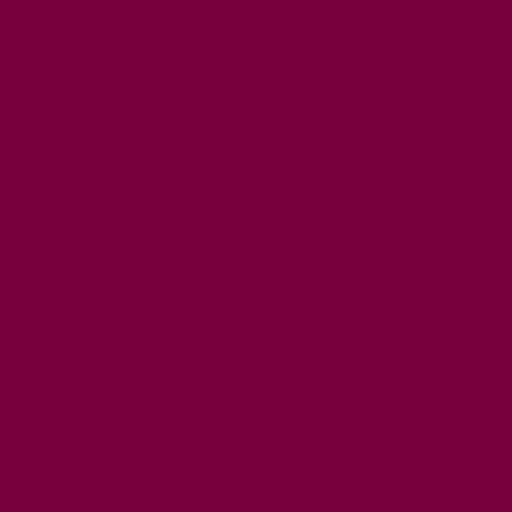

In [55]:
img

#### Для тех, кто не понял или хочет деталей

- [Броадкаcтинг](https://numpy.org/devdocs/user/theory.broadcasting.html)
- [Индексация](https://numpy.org/doc/stable/reference/arrays.indexing.html)